In [1]:
import matplotlib.pyplot as plt
import matplotlib
import math as math
import pandas as pd
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy import stats

In [2]:
def invFx1(u):
    if u < 0.5:
        b = math.sqrt(u/2)
    else:
        b = - math.sqrt(-(u - 1 )/2) + 1
    return b

In [3]:
def invFx2(u):
    if u < 0.5:
        b = math.sqrt(u/2)
    else:
        b = - math.sqrt(-(u - 1 )/2) + 1
    return b

In [4]:
def invFyxx2(u):
    random = np.random.uniform(0,1,1)
    if u < 0.5:
        b = random * (2 * u) + 1 - 2 * u
    else:
        b = random * (2 - 2 * u ) -1 + 2* u
    return b

In [5]:
def invFyxx1(u):
    random = np.random.uniform(0,1,1)
    if u < 0.5:
        b = random * (2 * u) 
    else:
        b = random * (2 - 2 * u)
    return b

In [6]:
def makePoint(coin, random):
    if coin > 0.5:
        return (tB, '')

In [7]:
def makeSample(c):
    if c > 0.5:
        x = invFx1(np.random.uniform(0,1,1))
        y = invFyxx1(x)
        clas = 0
    else:
        x = invFx2(np.random.uniform(0,1,1))
        y = invFyxx2(x)
        clas = 1
    return (x,y, clas)

In [8]:
def inRectangle(x,y, rx,ry, w,d):
    return x >= rx and rx + w > x and y >= ry and ry + h > y

In [9]:
#generar puntos de train y test
train_points = map(makeSample, np.random.uniform(0,1,1000))
test_points = map(makeSample, np.random.uniform(0,1,300))

xtr,ytr,ctr = zip(*train_points)
arr = np.array(list(zip(xtr,ytr,ctr)))
train_data = pd.DataFrame(data=arr,columns=['x','y','class'])
xte,yte,cte = zip(*test_points)
arrte = np.array(list(zip(xte,yte,cte)))
test_data = pd.DataFrame(data=arrte,columns=['x','y','class'])

In [53]:
def getSection_s1(x,y):
    #para esquema 1
    #__________
    #|0        |
    #|_________|
    #|1        |
    #|_________|
    if y > 0.5:
        return 0
    return 1

def getSection_s2(x,y):
    #para esquema 2
    #__________
    #|0   |1   |
    #|    |    |
    #|    |    |
    #|____|____|
    if x > 0.5:
        return 1
    return 0

def getSection_s3(x,y):
    #para esquema 2
    #__________
    #|0   |1   |
    #|____|____|
    #|2   |3   |
    #|____|____|
    if (x < 0.5):
        if (y > 0.5):
            return 0
        else:
            return 2
    else:
        if (y > 0.5):
            return 1
        else:
            return 3
        
def getSection_s4(x,y):
    #para esquema 4
    #__________
    #|0       /|
    #|      /  |
    #|    /    |
    #|  /    1 |
    #|/________|
    if (y > x):
        return 0
    else:
        return 1
    
def getSection_s5(x,y):
    #para esquema 5
    #__________
    #|\      0 |
    #|  \      |
    #|    \    |
    #| 1    \  |
    #|________\|
    if (y > (-x+1)):
        return 0
    else:
        return 1
    
def getSection_s6(x,y):
    #para esquema 6
    #__________
    #|\    0   /|
    #|  \    /  |
    #|1   \/  2 |
    #|    / \   |
    #|  /  3  \ |
    #|/________\|
    
    if (x < 0.5):
        if (y < x):
            return 3
        elif ((y >= x) and (y < (-x+1))):
            return 1
        elif (y >= (-x+1)):
            return 0
    else:
        if (y < (-x+1)):
            return 3
        elif ((y >= (-x+1)) and (y < x)):
            return 2
        elif (y >= x):
            return 0
        
def getSection(s,x,y):
    if s==1: 
        return getSection_s1(x,y)    
    elif s==2:
        return getSection_s2(x,y)
    elif s==3:
        return getSection_s3(x,y) 
    elif s==4:
        return getSection_s4(x,y) 
    elif s==5:
        return getSection_s5(x,y) 
    elif s==6:
        return getSection_s6(x,y)     

In [11]:
    #Analisis para esquema 1
    #__________
    #|         |
    #|_________|
    #|         |
    #|_________|
train_data_s1 = train_data
# se determina a que seccion del plano pertenece el punto
train_data_s1['section'] = train_data_s1.apply(lambda row: getSection_s1(row['x'], row['y']), axis=1)
# se cuentan la cantidad de puntos para cada seccion del plano de acuerdo a la clase de los puntos
section_results_s1 = train_data_s1.groupby(['section', 'class']).count().reset_index().rename(columns={'x': 'count'}).iloc[:,0:3]
# se determina un clasificador según la cantidad maxima de puntos de una determinada clase
classifier_s1 = section_results_s1.loc[section_results_s1.groupby('section')['count'].idxmax()].reset_index().iloc[:,1:4]

#def getClassification(section, classifier):
#    return classifier_s1.transpose().iloc[section][1]

test_data_s1 = test_data
# se identifica a que seccion del plano pertenece el punto
test_data_s1['section'] = test_data_s1.apply(lambda row: getSection_s1(row['x'], row['y']), axis=1)
# se clasifica el punto de acuerdo al clasificador elegido
test_data_s1['classification'] = test_data_s1.apply(lambda row, c=classifier_s1.transpose(): c.iloc[int(row['section'])][1], axis=1)
# se evalua si la clasificacion del punto fue exitosa
test_data_s1['result'] = test_data_s1.apply(lambda row: int(row['class'])==int(row['classification']), axis=1)
final_result_s1 = test_data_s1.groupby(['result']).count().reset_index().rename(columns={'x': 'count'}).iloc[:,0:2]

In [12]:
# en el clasificador se indica para cada seccion la clase dominante y la cantidad total de puntos de esa clase en el set
#de entrenamiento
classifier_s1

,section,class,count
0,0,1.0,370
1,1,0.0,388


In [13]:
test_data_s1.sample(2)
# x: coordenada en x
# y: coordenada en y
# class: clase original a la que pertenece el punto
# section: seccion en el plano segun esquema a la que pertenece el punto
# classification: clasificacion de la clase realizada segun el clasificador elegido
# result: indica si el resultado fue exitoso o fallido para la clasificacion propuesta

,x,y,class,section,classification,result
285,0.813548,0.845464,1.0,0,1.0,True
79,0.846386,0.736619,1.0,0,1.0,True


In [14]:
# resultados finales para el clasificador del esquema 1
final_result_s1

,result,count
0,False,56
1,True,244


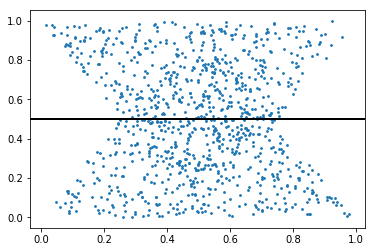

In [15]:
%matplotlib inline

plt.scatter(xtr,ytr,s=3.14)
# draw the grid
plt.axhline(0.5, lw=2, color='k', zorder=5)
    
plt.show()

In [44]:
def runClassification(s,train, test):
    train_data_g = train
    train_data_g['section'] = train_data_g.apply(lambda row: getSection(s,row['x'], row['y']), axis=1)
    section_results_g = train_data_g.groupby(['section', 'class']).count().reset_index().rename(columns={'x': 'count'}).iloc[:,0:3]
    classifier_g = section_results_g.loc[section_results_g.groupby('section')['count'].idxmax()].reset_index().iloc[:,1:4]
    test_data_g = test
    test_data_g['section'] = test_data_g.apply(lambda row: getSection(s,row['x'], row['y']), axis=1)
    test_data_g['classification'] = test_data_g.apply(lambda row, c=classifier_g.transpose(): c.at['class',int(row['section'])], axis=1)
    test_data_g['result'] = test_data_g.apply(lambda row: int(row['class'])==int(row['classification']), axis=1)
    final_result_g = test_data_g.groupby(['result']).count().reset_index().rename(columns={'x': 'count'}).iloc[:,0:2]
    return final_result_g



In [43]:
    #Analisis para esquema 1
    #__________
    #|         |
    #|_________|
    #|         |
    #|_________|
runClassification(1,train_data, test_data)    

,result,count
0,False,56
1,True,244


In [41]:
    #Analisis para esquema 2
    #__________
    #|0   |1   |
    #|    |    |
    #|    |    |
    #|____|____|
runClassification(2,train_data, test_data)    

,result,count
0,False,161
1,True,139


In [42]:
    #Analisis para esquema 3
    #__________
    #|0   |1   |
    #|____|____|
    #|2   |3   |
    #|____|____|
runClassification(3,train_data, test_data)

,result,count
0,False,56
1,True,244


In [47]:
    #para esquema 4
    #__________
    #|0       /|
    #|      /  |
    #|    /    |
    #|  /    1 |
    #|/________|
runClassification(4,train_data, test_data)

,result,count
0,False,90
1,True,210


In [51]:
    #para esquema 5
    #__________
    #|\      0 |
    #|  \      |
    #|    \    |
    #| 1    \  |
    #|________\|
runClassification(5,train_data, test_data)    

,result,count
0,False,96
1,True,204


In [54]:
    #para esquema 6
    #__________
    #|\    0   /|
    #|  \    /  |
    #|1   \/  2 |
    #|    / \   |
    #|  /  3  \ |
    #|/________\|
runClassification(6,train_data, test_data) 

,result,count
0,False,90
1,True,210


In [81]:
cols=['classificator','errors','valid']
lst=[]
for i in range(1, 7):
    classification = runClassification(i,train_data, test_data)
    lst.append([i,classification.at[0,'count'], classification.at[1,'count']])
general_result = pd.DataFrame(lst,columns=cols)
general_result.sort_values(by=['errors'],ascending=1)

,classificator,errors,valid
0,1,56,244
2,3,56,244
3,4,90,210
5,6,90,210
4,5,96,204
1,2,161,139


False